In [6]:
import pickle
import razdel
import os
import collections
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from random import shuffle
sns.set(color_codes=True)

In [7]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def tokenize(text):
    return [SEQUENCE_START] + [t.text for t in razdel.tokenize(text.lower())] + [SEQUENCE_END]

In [8]:
def do_vocab():
    PAD_INDEX = 0
    all_words = [y for x in tokenized for y in x] #vocab size 40-120
    
    token_counts = collections.Counter(all_words)
    vocabulary = {'PAD': PAD_INDEX, 'UNKNOWN': UNKNOWN_INDEX}
    for token, count in token_counts.most_common():
        if count > 1:
            vocabulary[token] = len(vocabulary)
        
    VOCABULARY_SIZE = len(vocabulary)
    print(VOCABULARY_SIZE)
    with open('vocabulary.pkl', 'wb') as handle:
        pickle.dump(vocabulary, handle)

In [9]:
UNKNOWN_INDEX = 1
SEQUENCE_START = '<START>'
SEQUENCE_END = '<END>'

data = load_obj('data_bot')
names_and_recipes = []
for recipe in data:
    try:
        intstructions = ''
        for sentence in recipe['recipeInstructions']:
            intstructions += sentence
    except:
        continue
    n_a_r = recipe['name'] + ':' + intstructions
    names_and_recipes.append(n_a_r)
shuffle(data)

In [5]:
tokenized = []
for recipe in names_and_recipes:
    t = tokenize(recipe)
    #if (len(t) >= 40 and len(t) < 100):
    if (len(t) >= 100 and len(t) <= 120):
        tokenized.append(t)
    
print(len(tokenized))

1709


In [6]:
vocabulary = load_obj('vocabulary')

In [7]:
VOCABULARY_SIZE = len(vocabulary)
print(VOCABULARY_SIZE)

8829


In [8]:
MAX_TEXT_LENGTH = 120
samples = []
targets = []
for recipe in tokenized:
    for tokens in recipe:
        indices = np.array([vocabulary.get(token, UNKNOWN_INDEX) for token in recipe],dtype=np.uint16)
        for i in range(1, len(recipe)):
            targets.append(indices[i])
            samples.append(indices[:min(MAX_TEXT_LENGTH,i)])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(samples, targets, test_size=0.1)
np.save('y_train_120_100_120',y_train)
np.save('y_test_120_100_120',y_test)
del y_train
del y_test
del samples
del targets

X_test = pad_sequences(X_test, MAX_TEXT_LENGTH,dtype=np.uint16)
np.save('X_test_120_100_120',X_test)
del X_test
X_train = pad_sequences(X_train, MAX_TEXT_LENGTH,dtype=np.uint16)
np.save('X_train_120_100_120',X_train)
del X_train

In [15]:
t = []
l = [] # words in a sentence in a recipes whose len: 40<=len<=120
max_sentences = []
max_recipe = ''
for recipe in names_and_recipes:    
    temp = recipe.split('.')
    for real_sentence in temp:
        temp_l = len(real_sentence.split())
        if (temp_l > 0):
            l.append(temp_l)
        if temp_l > 100:
            max_sentences.append(real_sentence)

In [17]:
np.mean(l)

10.168474019639723

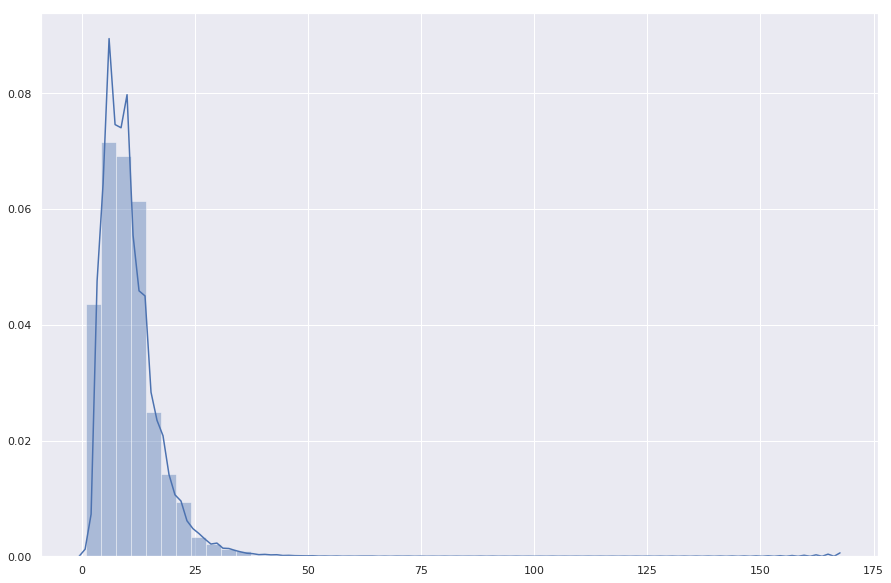

In [15]:
plt.figure(figsize=(15,10))
sns.distplot(l)

/home/human/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


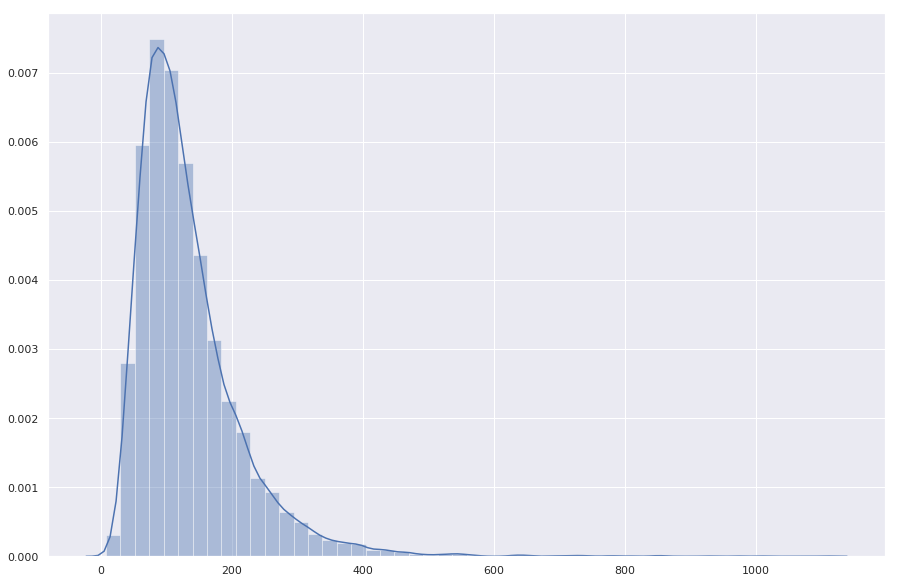

In [6]:
lens = sorted(list(map(len,tokenized)),reverse=True) # words in a recipe
plt.figure(figsize=(15,10))
sns.distplot(lens)